## Importing Libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt

## Generating data

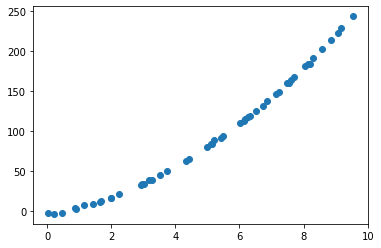

In [87]:
rng = np.random.RandomState(10)
x = 10 * rng.rand(50)
y = 2 * (x**2) + 7 * (x) - 5 + rng.randn(50)
plt.scatter(x, y)
plt.show()
N=x.shape[0]

## Loss Function (i)

In [88]:
def loss1(y_hat, y):
    l = abs((y_hat - y) ** 3 / 3)
    return l.mean()

## Loss Function (ii)

In [89]:
def loss2(y_hat, y):
    l = abs(y_hat - y)
    return l.mean()

## Loss Function (iii)

In [90]:
def loss3(y_hat, y):
    l = abs((y_hat - y) ** 4 / 4)
    return l.mean()

## Loss Function (iv)

In [91]:
def loss4(y_hat, y):
    l = abs((y_hat - y) ** 7 / 7)
    return l.mean()

## Forward Pass for linear regression

In [92]:
def forward_pass1(x,m,c):
    return m*x+c

## Forward Pass for polynomial regression

In [93]:
def forward_pass2(x,a,b,c):
    return a*(x**2) + b*x + c

## Gradient Descent (i)

In [94]:
def gradient_descent1(x,y,m,c,learning_rate,N):
   y_hat=forward_pass1(x,m,c)
   indices1 = []
   indices2 = []
   for i in range(N):
      if(y_hat[i]>=y[i]):
         indices1.append(i)
      else:
         indices2.append(i)
   x1 = x[indices1]
   x2 = x[indices2]
   y1 = y[indices1]
   y2 = y[indices2]
   y_hat1 = y_hat[indices1]
   y_hat2 = y_hat[indices2]
   dm = (3.0/N) * np.sum(np.multiply(x1,np.square((y_hat1) - y1)))
   dc = (3.0/N) * np.sum(np.square((y_hat1) - y1))
   m = m -learning_rate * dm
   c = c - learning_rate * dc
   dm = (3.0/N) * -np.sum(np.multiply(x2,np.square((y_hat2) - y2)))
   dc = (3.0/N) * -np.sum(np.square((y_hat2) - y2))
   m = m -learning_rate * dm
   c = c - learning_rate * dc
   return m,c    

## Gradient Descent (ii)

In [95]:
def gradient_descent2(x,y,m,c,learning_rate,N):
   y_hat=forward_pass1(x,m,c)
   indices1 = []
   indices2 = []
   for i in range(N):
      if(y_hat[i]>=y[i]):
         indices1.append(i)
      else:
         indices2.append(i)
   x1 = x[indices1]
   x2 = x[indices2]
   y1 = y[indices1]
   y2 = y[indices2]
   y_hat1 = y_hat[indices1]
   y_hat2 = y_hat[indices2]
   dm = (3.0/N) * np.sum(x1)
   dc = (3.0/N) * np.sum(1)
   m = m -learning_rate * dm
   c = c - learning_rate * dc
   dm = (3.0/N) * -np.sum(x2)
   dc = (3.0/N) * -np.sum(1)
   m = m -learning_rate * dm
   c = c - learning_rate * dc
   return m,c

## Gradient Descent (iii)

In [96]:
def gradient_descent3(x,y,a,b,c,learning_rate,N):
   y_hat=forward_pass2(x,a,b,c)
   da = (4.0/N) * -np.sum(np.multiply(x**2,np.power((y - y_hat),3)))
   db = (4.0/N) * -np.sum(np.multiply(x,np.power((y - y_hat),3)))
   dc = (4.0/N) * -np.sum(np.power((y - y_hat),3))
   a = a -learning_rate * da
   b = b -learning_rate * db
   c = c - learning_rate * dc
   return a,b,c

## Gradient Descent (iv)

In [97]:
def gradient_descent4(x,y,a,b,c,learning_rate,N):
   y_hat=forward_pass2(x,a,b,c)
   indices1 = []
   indices2 = []
   for i in range(N):
      if(y_hat[i]>=y[i]):
         indices1.append(i)
      else:
         indices2.append(i)
   x1 = x[indices1]
   x2 = x[indices2]
   y1 = y[indices1]
   y2 = y[indices2]
   y_hat1 = y_hat[indices1]
   y_hat2 = y_hat[indices2]
   da = (7.0/N) * np.sum(np.multiply(x1**2,np.power((y_hat1-y1),6)))
   db = (7.0/N) * np.sum(np.multiply(x1,np.power((y_hat1-y1),6)))
   dc = (7.0/N) * np.sum(np.power((y_hat1-y1),6))
   a = a -learning_rate * da/N
   b = b -learning_rate * db/N
   c = c - learning_rate * dc/N
   da = (7.0/N) * -np.sum(np.multiply(x2**2,np.power((y_hat2-y2),6)))
   db = (7.0/N) * -np.sum(np.multiply(x2,np.power((y_hat2-y2),6)))
   dc = (7.0/N) * -np.sum(np.power((y_hat2-y2),6))
   a = a -learning_rate * da/N
   b = b -learning_rate * db/N
   c = c - learning_rate * dc/N
   return a,b,c

## Implementation(i)

Obtained value of m:  [25.95165038]
Obtained value of c:  [-32.61718708]
Obtained line: y = [25.95165038] x + [-32.61718708]


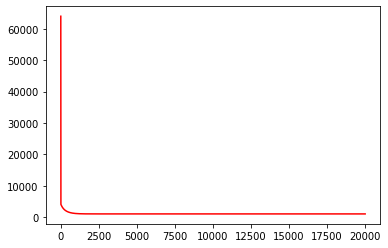

In [98]:
# Random Initialisation
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# Hyperparameters
learning_rate = 0.0001
num_epochs = 20000

L1=[]
for i in range(num_epochs):
    m1, c1 = gradient_descent1(x,y,m1,c1,learning_rate,N)
    y_hatA = forward_pass1(x,m1,c1)
    L1.append(loss1(y_hatA,y))

print("Obtained value of m: ", m1)
print("Obtained value of c: ", c1)
print("Obtained line: y =",m1,"x +",c1)

plt.plot(L1,'r')
plt.show()

## Implementation(ii)

Obtained value of m:  [20.18949298]
Obtained value of c:  [-0.61191534]
Obtained line: y = [20.18949298] x + [-0.61191534]


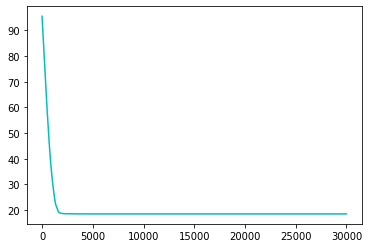

In [99]:
# Random Initialisation
m2 = np.random.randn(1)
c2 = np.random.randn(1)

# Hyperparameters
learning_rate = 0.001
num_epochs = 30000

L2=[]
for i in range(num_epochs):
    m2, c2 = gradient_descent2(x,y,m2,c2,learning_rate,N)
    y_hatB = forward_pass1(x,m2,c2)
    L2.append(loss2(y_hatB,y))

print("Obtained value of m: ", m2)
print("Obtained value of c: ", c2)
print("Obtained line: y =",m2,"x +",c2)

plt.plot(L2,'c')
plt.show()

## Implementation(iii)

Obtained value of a:  [2.68119578]
Obtained value of b:  [0.51016084]
Obtained value of c:  [0.30483403]
Obtained line: y = [2.68119578] x^2 + [0.51016084] x + [0.30483403]


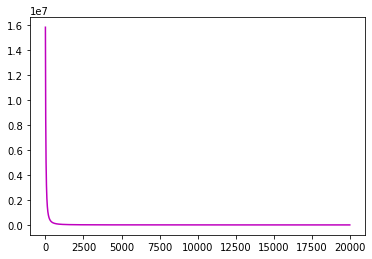

In [100]:
# Random Initialisation
a3 = np.random.randn(1)
b3 = np.random.randn(1)
c3 = np.random.randn(1)

# Hyperparameters
learning_rate = 0.0000000001
num_epochs = 20000

L3=[]
for i in range(num_epochs):
    a3, b3, c3 = gradient_descent3(x,y,a3,b3,c3,learning_rate,N)
    y_hatC = forward_pass2(x,a3,b3,c3)
    L3.append(loss3(y_hatC,y))

print("Obtained value of a: ", a3)
print("Obtained value of b: ", b3)
print("Obtained value of c: ", c3)
print("Obtained line: y =",a3,"x^2 +",b3,"x +", c3)

plt.plot(L3,'m')
plt.show()

## Implementation(iv)

Obtained value of a:  [2.41832904]
Obtained value of b:  [-0.03653533]
Obtained value of c:  [-0.86890596]
Obtained line: y = [2.41832904] x^2 + [-0.03653533] x + [-0.86890596]


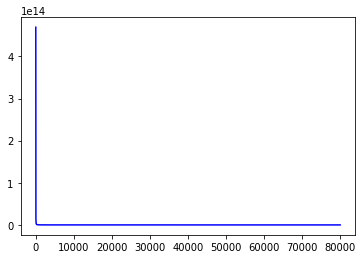

In [101]:
# Random Initialisation
a4 = np.random.randn(1)
b4 = np.random.randn(1)
c4 = np.random.randn(1)

# Hyperparameters
learning_rate = 0.000000000000001
num_epochs = 80000

L4=[]
for i in range(num_epochs):
    a4, b4, c4 = gradient_descent4(x,y,a4,b4,c4,learning_rate,N)
    y_hatD = forward_pass2(x,a4,b4,c4)
    L4.append(loss4(y_hatD,y))

print("Obtained value of a: ", a4)
print("Obtained value of b: ", b4)
print("Obtained value of c: ", c4)
print("Obtained line: y =",a4,"x^2 +",b4,"x +", c4)

plt.plot(L4,'b')
plt.show()

## Plotting the data and the obtained curves

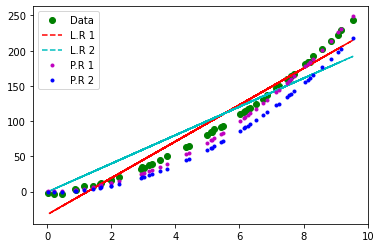

In [102]:
plt.plot(x,y,'go')
plt.plot(x,y_hatA,'r--')
plt.plot(x,y_hatB,'c--')
plt.plot(x,y_hatC,'m.')
plt.plot(x,y_hatD,'b.')
plt.legend(['Data','L.R 1','L.R 2','P.R 1','P.R 2'])
plt.show()